<a href="https://colab.research.google.com/github/oganiler/google_colab/blob/main/CNN_on_Fashion_MNIST_Dataset_By_Functional_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#Functional Keras API
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [25]:
#Load the data from fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

#get the train and test numpy data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Type:", type(x_train))
print("Shape train_x:", x_train.shape)
print("Shape train_y:", y_train.shape)
print("Shape test_x:", x_test.shape)
print("Shape test_y:", y_test.shape)

#normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0


Type: <class 'numpy.ndarray'>
Shape train_x: (60000, 28, 28)
Shape train_y: (60000,)
Shape test_x: (10000, 28, 28)
Shape test_y: (10000,)


In [26]:
#since the data is 2D gray scale, we add fake color dimension
#convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("New Shape train_x:", x_train.shape)
print("New Shape test_x:", x_test.shape)

New Shape train_x: (60000, 28, 28, 1)
New Shape test_x: (10000, 28, 28, 1)


In [8]:
#what is the number of unique values in y_train (number of classes)
K = len(set(y_train))
print( "number of classes:", K)

number of classes: 10


In [9]:
# Build the model using the functional API
# each convulation layer the number of output is doubled
# we use stride=2 so that each layer the image size will be halved instead of using pooling
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x) #convert the image into feature vector before the dense layer
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x) # arguments of the model constructor: (list of inputs, list of outputs)

In [10]:
#Compile and fit
#Note: make sure using the GPU for this !

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7407 - loss: 0.7076

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.7408 - loss: 0.7073 - val_accuracy: 0.8486 - val_loss: 0.4060
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8610 - loss: 0.3689 - val_accuracy: 0.8681 - val_loss: 0.3552
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8793 - loss: 0.3210 - val_accuracy: 0.8777 - val_loss: 0.3246
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8944 - loss: 0.2805 - val_accuracy: 0.8847 - val_loss: 0.3113
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9034 - loss: 0.2541 - val_accuracy: 0.8866 - val_loss: 0.3124
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9091 - loss: 0.2354 - val_accuracy: 0.8984 - val_loss: 0.2962
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9195 - loss: 0.2127 - val_accuracy: 0.8970 - val_loss: 0.2999
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9235 - loss: 0.19

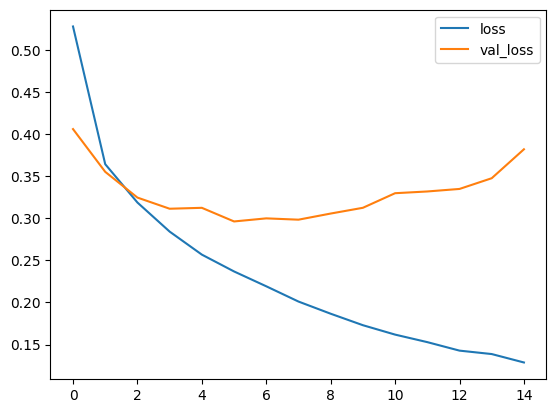

In [12]:
#plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

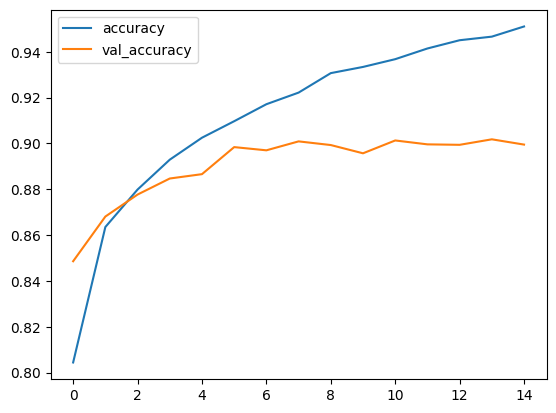

In [13]:
#plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

 21/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Confusion matrix, without normalization
[[868   1  24  22   3   1  74   0   7   0]
 [  2 973   2  15   2   0   3   0   3   0]
 [ 16   2 870  10  59   0  43   0   0   0]
 [ 12   4  14 916  34   2  17   0   1   0]
 [  1   2  52  18 884   0  42   0   1   0]
 [  0   1   0   0   0 964   0  24   1  10]
 [147   1  75  31 125   1 606   0  14   0]
 [  0   0   0   0   0   4   0 973   1  22]
 [  1   0   2   3   6   1   7   1 978   1]
 [  0   0   0   0   0   5   1  31   0 963]]


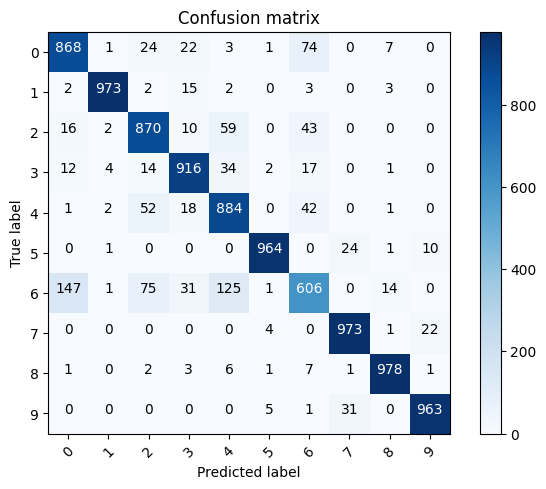

In [14]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

['T-shirt/top', '\nTrouser', '\nPullover', '\nDress', '\nCoat', '\nSandal', '\nShirt', '\nSneaker', '\nBag', '\nAnkle boot']
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


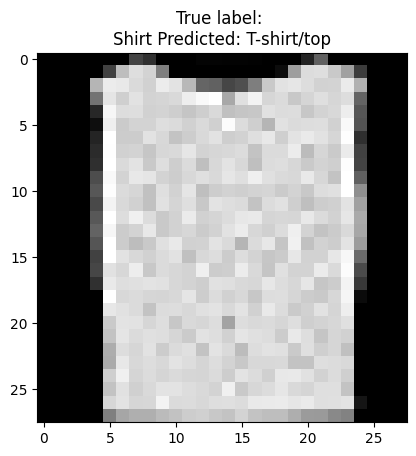

In [37]:
#show some misclassified examples
labels = '''T-shirt/top,
Trouser,
Pullover,
Dress,
Coat,
Sandal,
Shirt,
Sneaker,
Bag,
Ankle boot'''.split(',')

print(labels)

p_test = np.argmax(model.predict(x_test), axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));